In [4]:
import pylab as pl
import pykat
import numpy as np
% matplotlib inline
import matplotlib as plt

                                              ..-
    PyKat 0.8.2           _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,  
   `^-....____:   +.      www.gwoptics.org/pykat



In [5]:
# Read in kat file

katfile = 'Tcav_RFjitter.kat'

basekat = pykat.finesse.kat()

basekat.loadKatFile(katfile)

# PDH signal
# kat = basekat.deepcopy()

# kat.parseCommands("xaxis MC2 phi lin -90 90 180")

# out=kat.run()
# pl.figure()
# pl.plot(out.x,out['PDREFLPDH_I'], label='PDH I')
# pl.plot(out.x,out['PDREFLPDH_Q'], label='PDH Q')
# pl.legend()
# pl.xlabel('MC2 tuning [deg]')
# pl.ylabel('Error signal [W]')
# pl.grid()


--------------------------------------------------------------
Running kat - Started at 2016-01-25 14:50:42.052808

Finished in 0:00:00.885327
--------------------------------------------------------------
Running kat - Started at 2016-01-25 14:50:43.011074

Finished in 0:00:00.060452
--------------------------------------------------------------
Running kat - Started at 2016-01-25 14:50:43.094441

Finished in 0:00:00.072392
--------------------------------------------------------------
Running kat - Started at 2016-01-25 14:50:43.192745

Finished in 0:00:00.048036
--------------------------------------------------------------
Running kat - Started at 2016-01-25 14:50:43.269819

Finished in 0:00:00.038561


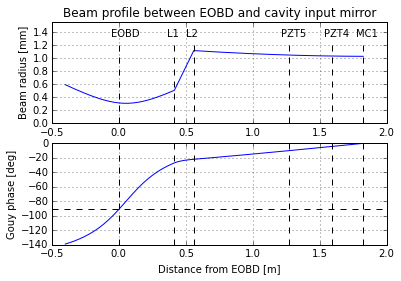

In [6]:
# plot beam size and Gouy phase over the distance between EOBD and L1

um=1e6
mm=1e3

sEOBDtoL1 = basekat.sEOBDtoL1.L.value
sL1toL2 = basekat.sL1toL2.L.value
sL2toPZT5 = basekat.sL2toPZT5.L.value
sPZT5toPZT4 = basekat.sPZT5toPZT4.L.value
sPZT4toMC1 = basekat.sPZT4toMC1.L.value

kat=basekat.deepcopy()
text=("""
bp wx_at_EOBD x w nEOBDout
bp wy_at_EOBD y w nEOBDout
gouy gouyx x sEOBDtoL1
gouy gouyy y sEOBDtoL1
xaxis sEOBDtoL1 l lin 0 %g 45""") % (sEOBDtoL1+0.4)
kat.parseCommands(text)
out1=kat.run()
out1_z = sEOBDtoL1-out1.x[::-1]
gouyxmax1=max(out1['gouyx'])

kat=basekat.deepcopy()
text=("""
bp wx_at_L1 x w nL1out
bp wy_at_L1 y w nL1out
gouy gouyx x sL1toL2
gouy gouyy y sL1toL2
xaxis sL1toL2 l lin 0 %g 15""") % sL1toL2
kat.parseCommands(text)

out2=kat.run()
out2_z = sL1toL2-out2.x[::-1] + max(out1_z)
gouyxmax2=max(out2['gouyx'])

kat=basekat.deepcopy()
text=("""
bp wx_at_L2 x w nL2out
bp wy_at_L2 y w nL2out
gouy gouyx x sL2toPZT5
gouy gouyy y sL2toPZT5
xaxis sL2toPZT5 l lin 0 %g 69""") % sL2toPZT5

kat.parseCommands(text)

out3=kat.run()
out3_z = sL2toPZT5-out3.x[::-1] + max(out2_z)
gouyxmax3=max(out3['gouyx'])

kat=basekat.deepcopy()
text=("""
bp wx_at_PZT5 x w nPZT5refl
bp wy_at_PZT5 y w nPZT5refl
gouy gouyx x sPZT5toPZT4
gouy gouyy y sPZT5toPZT4
xaxis sPZT5toPZT4 l lin 0 %g 32""") % sPZT5toPZT4

kat.parseCommands(text)
out4=kat.run()
out4_z = sPZT5toPZT4-out4.x[::-1] + max(out3_z)
gouyxmax4=max(out4['gouyx'])

kat=basekat.deepcopy()
text=("""
bp wx_at_MC1 x w nPZT4refl
bp wy_at_MC1 y w nPZT4refl
gouy gouyx x sPZT4toMC1
gouy gouyy y sPZT4toMC1
xaxis sPZT4toMC1 l lin 0 %g 24""") % sPZT4toMC1

kat.parseCommands(text)

kat.saveScript('check.kat')

out5=kat.run()
out5_z = sPZT4toMC1-out5.x[::-1] + max(out4_z)
gouyxmax5=max(out5['gouyx'])

out_z = np.hstack((out1_z,out2_z,out3_z,out4_z,out5_z))
out_wx = np.hstack((out1['wx_at_EOBD'][::-1],out2['wx_at_L1'][::-1],out3['wx_at_L2'][::-1],out4['wx_at_PZT5'][::-1],out5['wx_at_MC1'][::-1]))*mm

out_gouyx = -np.hstack((out1['gouyx'][::-1]+gouyxmax2+gouyxmax3+gouyxmax4+gouyxmax5,
                      out2['gouyx'][::-1]+gouyxmax3+gouyxmax4+gouyxmax5,
                      out3['gouyx'][::-1]+gouyxmax4+gouyxmax5,
                      out4['gouyx'][::-1]+gouyxmax5,
                      out5['gouyx'][::-1]))
label_h=max(out_wx)*1.2
label_hoff=-0.05

pl.figure()
pl.subplot(211)
pl.plot(out_z,out_wx, label='xaxis')
pl.ylabel('Beam radius [mm]')
pl.ylim((0,max(out_wx)*1.4))
pl.axvline(0,0,max(out_wx)*0.7,linestyle='--',color='k')
pl.annotate(s='EOBD',xy=(0+label_hoff,label_h))
pl.axvline(sEOBDtoL1,0,max(out_wx)*0.7,linestyle='--',color='k')
pl.annotate(s='L1',xy=(sEOBDtoL1+label_hoff,label_h))
pl.axvline(sEOBDtoL1+sL1toL2,0,max(out_wx)*0.7,linestyle='--',color='k')
pl.annotate(s='L2',xy=(sEOBDtoL1+sL1toL2+label_hoff,label_h))
pl.axvline(sEOBDtoL1+sL1toL2+sL2toPZT5,0,max(out_wx)*0.7,linestyle='--',color='k')
pl.annotate(s='PZT5',xy=(sEOBDtoL1+sL1toL2+sL2toPZT5+label_hoff,label_h))
pl.axvline(sEOBDtoL1+sL1toL2+sL2toPZT5+sPZT5toPZT4,0,max(out_wx)*0.7,linestyle='--',color='k')
pl.annotate(s='PZT4',xy=(sEOBDtoL1+sL1toL2+sL2toPZT5+sPZT5toPZT4+label_hoff,label_h))
pl.axvline(sEOBDtoL1+sL1toL2+sL2toPZT5+sPZT5toPZT4+sPZT4toMC1,0,max(out_wx)*0.7,linestyle='--',color='k')
pl.annotate(s='MC1',xy=(sEOBDtoL1+sL1toL2+sL2toPZT5+sPZT5toPZT4+sPZT4toMC1+label_hoff,label_h))
pl.grid()
pl.title('Beam profile between EOBD and cavity input mirror')

pl.subplot(212)
pl.plot(out_z,out_gouyx, label='xaxis')
pl.xlabel('Distance from EOBD [m]')
pl.ylabel('Gouy phase [deg]')
pl.axvline(0,linestyle='--',color='k')
pl.axvline(sEOBDtoL1,linestyle='--',color='k')
pl.axvline(sEOBDtoL1+sL1toL2,linestyle='--',color='k')
pl.axvline(sEOBDtoL1+sL1toL2+sL2toPZT5,linestyle='--',color='k')
pl.axvline(sEOBDtoL1+sL1toL2+sL2toPZT5+sPZT5toPZT4,linestyle='--',color='k')
pl.axvline(sEOBDtoL1+sL1toL2+sL2toPZT5+sPZT5toPZT4+sPZT4toMC1,linestyle='--',color='k')
pl.axhline(-90,linestyle='--',color='k')
pl.grid()
pl.savefig('EOBDtoMC1profile.pdf')

In [7]:
# Calculate some useful beam parameters

kat=basekat.deepcopy()
kat.parseCommands('bp w0atEOBD x w0 nEOBDout')
kat.noxaxis=True
out=kat.run()

print 'waist size at EOBD is '+str(out['w0atEOBD']*um)+'um'
print 'divergence angle at EOBD is '+str(1064e-9/pl.pi/out['w0atEOBD']*1000)+' mrad'

kat=basekat.deepcopy()
kat.parseCommands('bp w0cav x w0 nMC2in')
kat.noxaxis=True
out=kat.run()

print 'waist size at EOBD is '+str(out['w0cav']*um)+'um'
print 'divergence angle of cavity waist is '+str(1064e-9/pl.pi/out['w0cav']*1000)+' mrad'


--------------------------------------------------------------
Running kat - Started at 2016-01-25 14:50:45.227222

Finished in 0:00:00.052863
waist size at EOBD is 303.741837938um
divergence angle at EOBD is 1.1150315057 mrad
--------------------------------------------------------------
Running kat - Started at 2016-01-25 14:50:45.302458

Finished in 0:00:00.071448
waist size at EOBD is 1026.79684161um
divergence angle of cavity waist is 0.3298429691 mrad


In [8]:
# calculate PZT pitch tilt degree of freedom 
sMC1toMC3 = basekat.sMC1toMC3.L.value
d_PZT5to_cavw0 = sPZT5toPZT4 + sPZT4toMC1 + 0.5*sMC1toMC3
d_PZT4to_cavw0 = sPZT4toMC1 + 0.5*sMC1toMC3
drive_ratio = d_PZT5to_cavw0/d_PZT4to_cavw0
print "PZT4 must be driven "+str(drive_ratio)+" times harder than PZT5 to get tilt only"


PZT4 must be driven 2.1149825784 times harder than PZT5 to get tilt only


--------------------------------------------------------------
Running kat - Started at 2016-01-25 14:50:53.277837

Finished in 0:00:02.563781
HG01 mode is resonant at 14730000.0 Hz


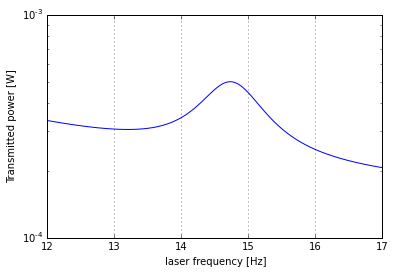

In [9]:
# Check resonance frequency of HG01 mode

MHz=1e-6

kat = basekat.deepcopy()

kat.parseCommands("""
attr PZT5 ybeta 10u
pd PDtrans nMCTRANS
xaxis laser f lin 12M 17M 5000""")

out=kat.run()

pl.figure()
pl.semilogy(out.x*MHz,out['PDtrans'])
pl.xlabel('laser frequency [Hz]')
pl.ylabel('Transmitted power [W]')
pl.grid()
xs=out.x
maxval=max(out['PDtrans'])
index_max=out['PDtrans'].argmax()
max_f=xs[index_max]
print "HG01 mode is resonant at "+str(max_f)+" Hz"
#checkvec=out['PDtrans']-maxval


In [13]:
# Check ratio of alignment error signal responses or two DOFs at 14730000 Hz jitter frequency
# by using fsig method

kat = basekat.deepcopy()

Iphase = 72.35

Qphase = Iphase - 90

# Drive translation by driving PZT5 and PZT4 with equal amplitudes but opposite phases

text=("""
fsig translation PZT5 ybeta $fdither 0 1
fsig translation PZT4 ybeta $fdither 180 1

pd2 ASCPDREFL_I $fjitter %g $fdither 0 nPDREFLin
pd2 ASCPDREFL_Q $fjitter %g $fdither 0 nPDREFLin
""") % (Iphase, Qphase)

kat.parseCommands(text)
kat.noxaxis=True
out=kat.run()

transI=out['ASCPDREFL_I']
transQ=out['ASCPDREFL_Q']

kat = basekat.deepcopy()

# Drive tilt by driving PZT5 and PZT4 with opposite phases and the pre-calculated amplitude ratio
text=("""
fsig tilt PZT5 ybeta $fdither 0 1
fsig tilt PZT4 ybeta $fdither 180 %g

pd2 ASCPDREFL_I $fjitter %g $fdither 0 nPDREFLin
pd2 ASCPDREFL_Q $fjitter %g $fdither 0 nPDREFLin
""") % (drive_ratio, Iphase, Qphase)

kat.parseCommands(text)
kat.noxaxis=True

out=kat.run()

tiltI=out['ASCPDREFL_I']
tiltQ=out['ASCPDREFL_Q']

# Print results for tilt and translation

print "I-phase response to translation = " +str(transI)+" W/rad on PZT5"
print "Q-phase response to translation = " +str(transQ)+" W/rad on PZT5"
print "I-phase response to tilt = " +str(tiltI)+" W/rad on PZT5"
print "Q-phase response to tilt = " +str(tiltQ)+" W/rad on PZT5\n"

print "\nRatio of [ tilt->Iphase : trans->Qphase ] =  "+str(tiltI/transQ)

--------------------------------------------------------------
Running kat - Started at 2016-01-25 14:51:33.278919
** Warning: name 'translation' already used. This may cause confusion.

Finished in 0:00:00.538165
--------------------------------------------------------------
Running kat - Started at 2016-01-25 14:51:33.839877
** Warning: name 'tilt' already used. This may cause confusion.

Finished in 0:00:00.070041
I-phase response to translation = -0.00273068801246 W/rad on PZT5
Q-phase response to translation = 0.0696597054883 W/rad on PZT5
I-phase response to tilt = 0.778151473951 W/rad on PZT5
Q-phase response to tilt = -0.000328168657219 W/rad on PZT5


Ratio of [ tilt->Iphase : trans->Qphase ] =  11.1707545775


Parsing `put PZT4 ybeta $mx1` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2016-01-25 14:52:20.160574

Finished in 0:00:00.152935
Parsing `put PZT4 ybeta $PZT4scale` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2016-01-25 14:52:20.337367

Finished in 0:00:00.106898
I-phase response to translation = -0.00273069595896 W/rad on PZT5
Q-phase response to translation = 0.0696597019807 W/rad on PZT5
I-phase response to tilt = 0.778120375575 W/rad on PZT5
Q-phase response to tilt = -0.000339727871455 W/rad on PZT5

Ratio of [ tilt->Iphase : trans->Qphase ] =  11.1703087072


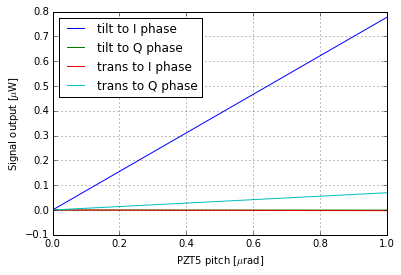

In [15]:
# Check ratio of alignment error signal responses or two DOFs at 14730000 Hz jitter frequency
# by using alignment sweep method
uW=1e6
urad=1e6

kat = basekat.deepcopy()

text = ("""
pd1 ASCPDREFL_I $fjitter %g nPDREFLin
pd1 ASCPDREFL_Q $fjitter %g nPDREFLin

xaxis PZT5 ybeta lin 0 1u 100
put PZT4 ybeta $mx1

""") % (Iphase, Qphase)

kat.parseCommands(text)
out_trans = kat.run()

kat = basekat.deepcopy()

text = ("""
pd1 ASCPDREFL_I $fjitter %g nPDREFLin
pd1 ASCPDREFL_Q $fjitter %g nPDREFLin

xaxis PZT5 ybeta lin 0 1u 100
func PZT4scale = (-1) * $x1 * %g
put PZT4 ybeta $PZT4scale

""") % (Iphase, Qphase, drive_ratio)

kat.parseCommands(text)
out_tilt = kat.run()

pl.figure()
pl.plot(out_tilt.x*urad,out_tilt['ASCPDREFL_I']*uW,label='tilt to I phase')
pl.plot(out_tilt.x*urad,out_tilt['ASCPDREFL_Q']*uW,label='tilt to Q phase')
pl.plot(out_tilt.x*urad,out_trans['ASCPDREFL_I']*uW,label='trans to I phase')
pl.plot(out_tilt.x*urad,out_trans['ASCPDREFL_Q']*uW,label='trans to Q phase')
pl.legend(loc=0)
pl.xlabel('PZT5 pitch [$\mu$rad]')
pl.ylabel('Signal output [$\mu$W]')
pl.grid()

transI = out_trans['ASCPDREFL_I']
transQ = out_trans['ASCPDREFL_Q']
tiltI = out_tilt['ASCPDREFL_I']
tiltQ = out_tilt['ASCPDREFL_Q']
x=out_tilt.x

transIslope=(transI[len(transI)-1]-transI[0])/(x[len(x)-1]-x[0])
transQslope=(transQ[len(transQ)-1]-transQ[0])/(x[len(x)-1]-x[0])
tiltIslope=(tiltI[len(tiltI)-1]-tiltI[0])/(x[len(x)-1]-x[0])
tiltQslope=(tiltQ[len(tiltQ)-1]-tiltQ[0])/(x[len(x)-1]-x[0])


print "I-phase response to translation = " +str(transIslope)+" W/rad on PZT5"
print "Q-phase response to translation = " +str(transQslope)+" W/rad on PZT5"
print "I-phase response to tilt = " +str(tiltIslope)+" W/rad on PZT5"
print "Q-phase response to tilt = " +str(tiltQslope)+" W/rad on PZT5"


#print "Quadrature sum of responses = "+str(out['ASCPDREFL_I']+out['ASCPDREFL_Q'])
print "\nRatio of [ tilt->Iphase : trans->Qphase ] =  "+str(tiltIslope/transQslope)
